In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
data = pd.read_csv('times.txt', names=['size','num_threads','load_t',\
                                       'calc_t'], header=None)

In [37]:
data

,size,num_threads,load_t,calc_t
0,3,1,57,109
1,3,1,62,101
2,3,1,46,76
3,3,1,47,75
4,3,1,59,71
5,3,1,43,77
6,3,1,54,68
7,3,1,44,79
8,3,1,62,79
9,3,1,47,76


In [140]:
mean_data = data.groupby(['size','num_threads']).mean().reset_index()
mean_data.to_csv('mean_data.csv')
mean_data

,size,num_threads,load_t,calc_t
0,3,1,52.1,81.1
1,3,2,56.3,121.1
2,3,3,58.8,123.6
3,3,4,57.8,183.4
4,3,6,57.7,311.1
5,3,8,56.7,406.0
6,3,16,46.8,157.7
7,3,24,45.4,157.2
8,3,32,46.4,164.5
9,10,1,63.5,77.4


Зависимость времени считывания матрицы от её размеров


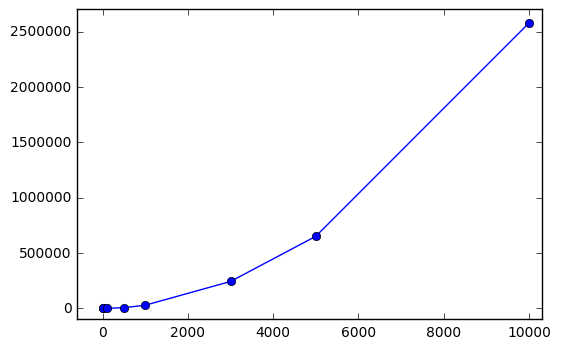

In [139]:
sizes = [3,10,100,500,1000,3000,5000,10000]
num_threads = [1,2,3,4,6,8,16,24,32]

print 'Зависимость времени считывания матрицы от её размеров'

calc_time = mean_data.ix[mean_data['num_threads'] == 1][['size',\
                                                         'load_t']]
plt.figure()
plt.plot(calc_time['size'], calc_time['load_t'],'bo-')
plt.xlim((-600,10300))
plt.ylim((-100000,2700000))
plt.show()

Графики Ускорения


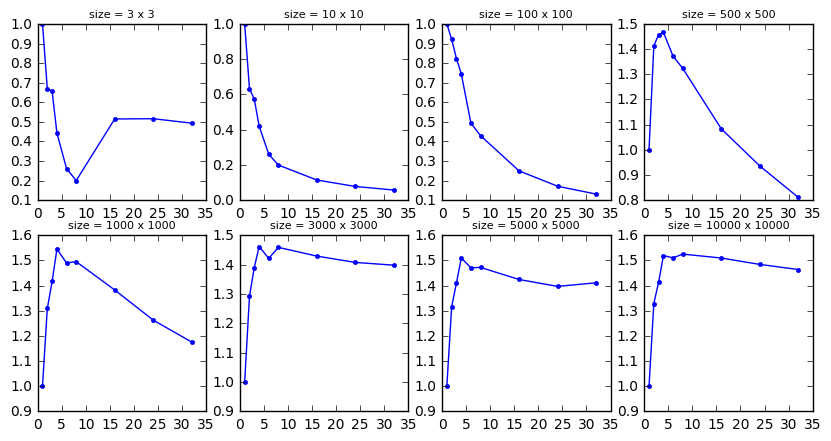

In [122]:
print 'Графики Ускорения'

plt.figure(figsize=(10,5))

for s,i in zip(sizes,range(241,249)):
    calc_time = mean_data.ix[mean_data['size'] == s][['num_threads',\
                                                      'calc_t']]
    plt.subplot(i)
    plt.title('size = {0} x {0}'.format(s), fontsize=8)
    plt.plot(calc_time['num_threads'], \
             calc_time['calc_t'].values[0] * 1.0 / \
                                 np.array(calc_time['calc_t']), 'b.-')

plt.show()